# transformada de Fourier

## 1) Código personal que calcule transformada de Fourier de una función f(x)

In [1]:
import matplotlib. pyplot as plt
import numpy as np
import math
from scipy.integrate import odeint

### Construcción de la transformada de Fourier

Tenemos una función $f(x)$ periódica de periodo $2l$ y de cuadrado integrable sobre $[-l,l]$. La función tiene una serie de Fourier convergente:  

\begin{equation}
f(x) = \sum _{n =-\infty}^{\infty} C_n \omega_n(x)
\end{equation}


donde:
\begin{equation}
       C_n =  \int_{-l}^{l} \frac{e^{-in\pi\epsilon/l}}{\sqrt{2l}} f(\epsilon) d\epsilon \quad y \quad \omega_n(x) = \frac{e^{in\pi x/l}}{\sqrt{2l}} \quad \forall n \in Z
\end{equation}


\begin{equation}
\Rightarrow  f(x) = \sum _{n =-\infty}^{\infty} \left( \int_{-l}^{l} \frac{e^{-in\pi\epsilon/l}}{\sqrt{2l}} f(\epsilon) d\epsilon \right) \frac{e^{in\pi x/l}}{\sqrt{2l}}
\end{equation}


Ahora, definamos $k_n = n\pi/l$, el parametro $k$ va a cambiar de $- \infty$ hasta $\infty$ por un salto de longitud $\Delta k_n = k_{n+1} - k_n = \pi/l$ y entonces $1/l = \Delta k_n/\pi$

Cuando $l \rightarrow \infty$ tenemos que:

i) la intgral $\int_{-l}^{l}$ va a devenir $\int_{-\infty}^{\infty}$

ii) $k_n$ va a tender a una variable continua $k$

iii) $f(x)$ va a devenir:

\begin{equation}
\Rightarrow  f(x) = \sum _{n =-\infty}^{\infty} \left( \int_{-l}^{l} \frac{e^{-i k_n \epsilon}}{\sqrt{2\pi}} f(\epsilon) d\epsilon \right) \frac{e^{i k_n x}}{\sqrt{2\pi}} \Delta k_n
\end{equation}
\begin{equation}
f(x) = \sum _{n =-\infty}^{\infty} \hat{f}(k_n)  \frac{e^{i k_n x}}{\sqrt{2\pi}} \Delta k_n
\end{equation}
\begin{equation}
f(x) \rightarrow  \int _{-\infty}^{\infty} \hat{f}(k)  \frac{e^{i k x}}{\sqrt{2\pi}} dk
\end{equation}

Usamos:
\begin{equation}
f(x) = \sum _{n =-\infty}^{\infty} \hat{f}(k_n)  \frac{e^{i k_n x}}{\sqrt{2\pi}} \Delta k_n
\end{equation}

def trans_fourire(fun,k_n):
    
    #coeficiente
    norm = np.divide(1,np.power(2*np.pi,0.5))
    x = k_n
    
    f_x = []
    for j in range(len(k)):
        arg_2 = []
        if j<len(k)-1:
            ex = np.exp(complex(0,1)*k_n[j]*x[j])
            arg_2.append(fun[j]*ex*norm*(k_n[j+1]-k_n[j]))

        f_x.append(np.sum(arg_2))
    return np.array(f_x)*len(x)

In [351]:
def trans_fourire(fun,eps):
    
    #coeficiente
    l = np.amax(eps)
    n = np.linspace(-np.amin(eps),np.amax(eps),len(eps))
    k_n = n*np.pi/l 
    norm = np.divide(1,np.power(2*np.pi,0.5))
    
    f_k_n = []
    for i in range(len(k)):
        arg = []
        if i < len(k)-1:
            ex_1 = np.exp(-complex(0,1)*k_n[i]*eps[i])
            arg.append(fun[i+1]*ex_1*(eps[i+1]-eps[i])*norm)
        f_k_n.append(np.sum(arg))
    
    #transformada
    f_x = []
    for j in range(len(k)):
        arg_2 = []
        if j < len(k)-1:
            ex_2 = np.exp(complex(0,1)*k_n[j+1]*eps[j])
            arg_2.append(f_k_n[j+1]*ex_2*(np.pi/l)*norm)
        f_x.append(np.sum(arg_2))
    return np.array(f_x)*len(eps)

Definimos la función que queremos transformar:

\begin{equation}
\hat{f}(k) = e^{-a^2(k-m)^2/2 }
\end{equation}

In [352]:
def gaus (x,a,m):
    return np.exp(-np.power((x-m),2)/(2*a**2))/a

In [355]:
k = np.linspace(-5,5,1000)
f_k = gaus(k,1,0)
f_x = trans_fourire(f_k,k)

/home/echeveste/.local/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


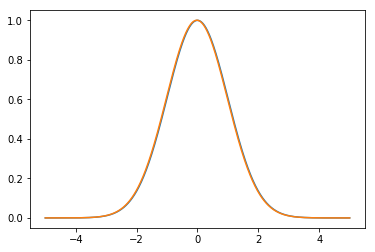

In [356]:
plt.plot(k[:],f_k)
plt.plot(k[:],f_x)

In [328]:
n=complex(3,6)
n.real

3.0